### Comparision of the 4 simulators for TurtleBot

In [2]:
import pandas as pd


In [22]:
# Load and display the contents of the CSV file
file_path = 'spot_combined.csv'
data = pd.read_csv(file_path)

data = data.dropna(axis="columns", how="any")
data.columns = ['Iteration','CPU_Usage', 'Memory_Usage', 'FPS','GPU_Usage','Simulator']

# Display all rows of the dataframe
data

,Iteration,CPU_Usage,Memory_Usage,FPS,GPU_Usage,Simulator
0,1,41.0,3.900000,23.000000,0,Gazebo
1,2,39.5,3.900000,25.000000,0,Gazebo
2,3,39.3,3.900000,26.000000,0,Gazebo
3,4,40.6,3.900000,27.000000,0,Gazebo
4,5,42.6,3.900000,28.000000,0,Gazebo
5,6,41.4,3.900000,28.000000,0,Gazebo
6,7,43.2,3.900000,28.000000,0,Gazebo
7,8,43.0,3.900000,29.000000,0,Gazebo
8,9,43.8,3.900000,29.000000,0,Gazebo
9,10,40.6,3.900000,29.000000,0,Gazebo


In [23]:
# # Correcting the header and propagating simulator names
# data.columns = ['CPU_Usage', 'Memory_Usage', 'FPS','GPU_Usage','Simulator']
# data['Simulator'] = data['Simulator'].fillna(method='ffill')


# # Display cleaned data
# data


ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [24]:
# Calculating descriptive statistics for each metric grouped by simulator
stats = data.groupby('Simulator').agg({
    'CPU_Usage': ['mean', 'std', 'median'],
    'Memory_Usage': ['mean', 'std', 'median'],
    'FPS': ['mean', 'std', 'median'],
    'GPU_Usage': ['mean','std','median']
}).round(2)

stats


CPU_Usage              Memory_Usage                 FPS        \
                 mean   std median         mean   std median   mean   std   
Simulator                                                                   
CoppeliaSim    236.55  5.07  237.7         0.25  0.00   0.25  30.63  2.24   
Gazebo          39.59  3.19   40.6         3.90  0.00   3.90  27.80  1.82   
Isaac Sim        4.58  1.02    4.1        44.56  0.05  44.60  32.61  0.10   
Webots          12.05  4.48   12.5        81.26  0.05  81.30  22.91  0.98   

                   GPU_Usage               
            median      mean   std median  
Simulator                                  
CoppeliaSim  30.35      0.00  0.00    0.0  
Gazebo       29.00      0.00  0.00    0.0  
Isaac Sim    32.54     35.33  3.81   35.0  
Webots       22.80      0.00  0.00    0.0

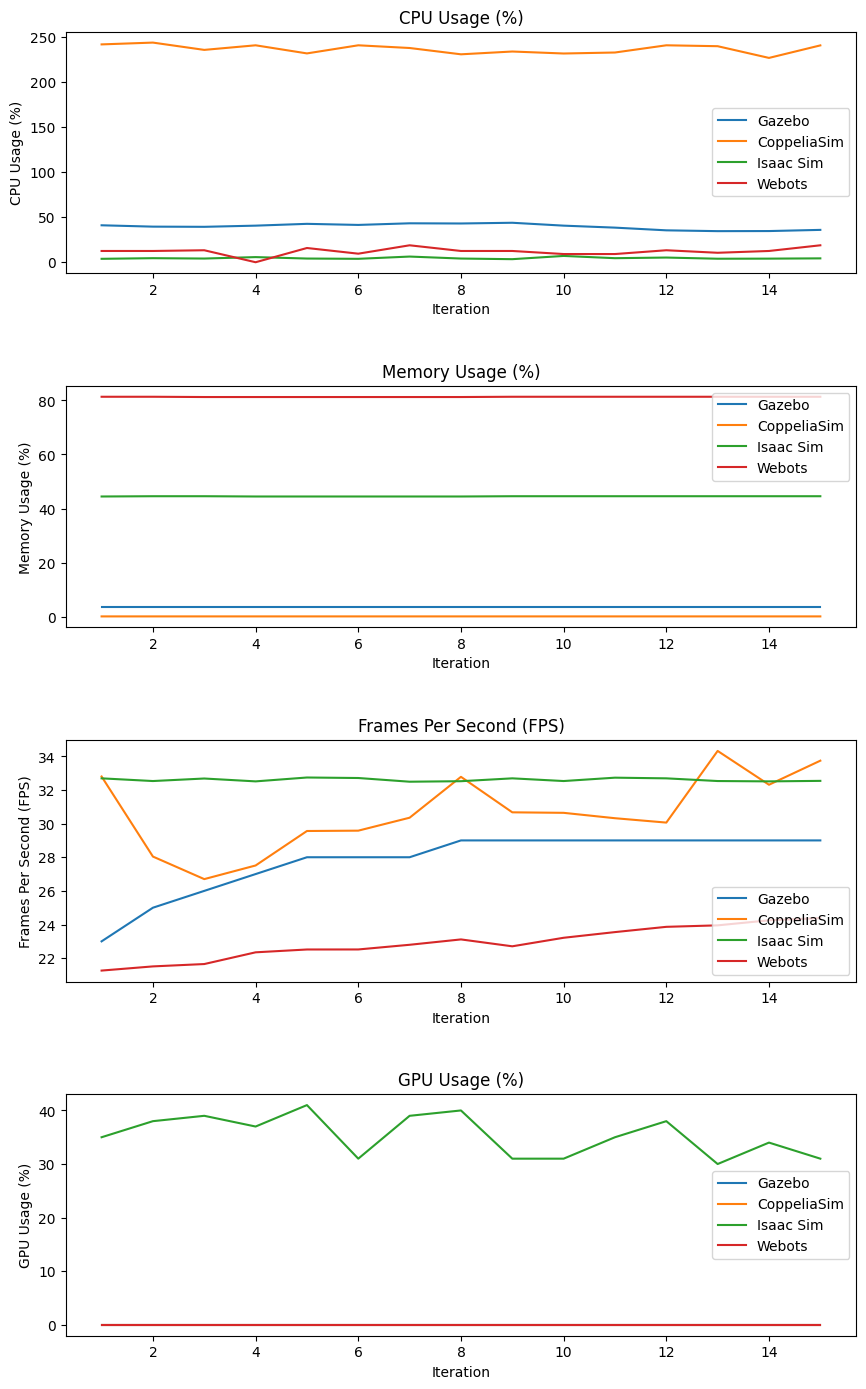

In [27]:
# Setting up the plots
# Reassigning correct column names and cleaning up the data again
import matplotlib.pyplot as plt
data.columns = ['Iteration','CPU_Usage', 'Memory_Usage', 'FPS','GPU_Usage','Simulator']
data['Simulator'] = data['Simulator'].fillna(method='ffill')


fig, axes = plt.subplots(4, 1, figsize=(10, 15))
fig.tight_layout(pad=6.0)

# Titles for plots
titles = ['CPU Usage (%)', 'Memory Usage (%)', 'Frames Per Second (FPS)','GPU Usage (%)']

# Data for plotting
metrics = ['CPU_Usage', 'Memory_Usage', 'FPS','GPU_Usage']

# Plotting each metric
for ax, metric, title in zip(axes, metrics, titles):
    for simulator in data['Simulator'].unique():
        subset = data[data['Simulator'] == simulator]
        ax.plot(subset['Iteration'], subset[metric], label=simulator)
    ax.set_title(title)
    ax.set_xlabel('Iteration')
    ax.set_ylabel(title)
    ax.legend()

plt.show()



Here are the plots comparing the CPU usage, memory usage, and frames per second (FPS) across different simulators:

1. **CPU Usage (%)**: You can see significant differences in the CPU usage profiles. CoppaliaSim consistently uses a lot more CPU compared to the others, indicating it might be processing more complex simulations or less optimized in terms of CPU usage.

2. **Memory Usage (%)**: The memory usage is relatively stable across iterations for each simulator, with WeBots showing significantly higher memory usage compared to others. This could impact performance on systems with limited memory resources.

3. **Frames Per Second (FPS)**: WeBots and CoppaliaSim show relatively higher and more stable FPS, indicating better performance in terms of rendering or processing frames. In contrast, Gazebo and IssacSim have much lower FPS, which might be problematic for real-time simulation tasks.

These visualizations help identify which simulators are more resource-intensive and which provide better real-time performance.